In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, validation_split=0.1,
                    epochs=5, batch_size=128, verbose=2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/5
422/422 - 44s - 105ms/step - accuracy: 0.8785 - loss: 0.3927 - val_accuracy: 0.9797 - val_loss: 0.0734
Epoch 2/5
422/422 - 41s - 98ms/step - accuracy: 0.9599 - loss: 0.1353 - val_accuracy: 0.9850 - val_loss: 0.0505
Epoch 3/5
422/422 - 41s - 98ms/step - accuracy: 0.9691 - loss: 0.1008 - val_accuracy: 0.9887 - val_loss: 0.0435
Epoch 4/5
422/422 - 86s - 203ms/step - accuracy: 0.9745 - loss: 0.0839 - val_accuracy: 0.9873 - val_loss: 0.0408
Epoch 5/5
422/422 - 44s - 104ms/step - accuracy: 0.9777 - loss: 0.0715 - val_accuracy: 0.9883 - val_loss: 0.0371
313/313 - 3s - 8ms/step - accuracy: 0.9880 - loss: 0.0334
Test accuracy: 0.9880


Text(0, 0.5, 'Loss')

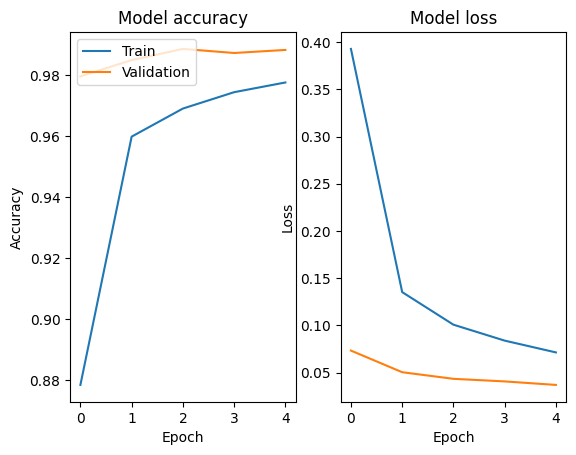

In [4]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


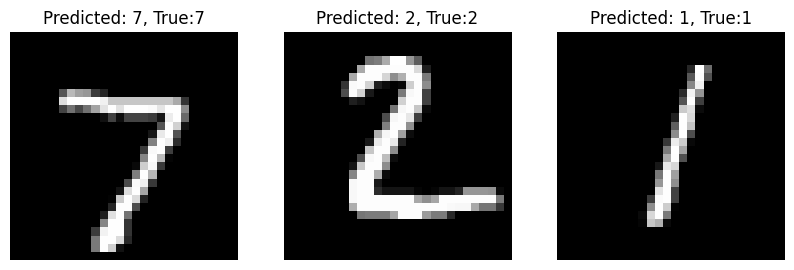

In [5]:
import numpy as np

#Predict on the test set
predictions = model.predict(x_test)

#Convert predictions to labels
predicted_labels = [tf.argmax(tf.convert_to_tensor(prediction)).numpy() for prediction in predictions]

plt.figure(figsize=(10, 4))
num_images = 3
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True:{np.argmax(y_test[i])}")
    plt.axis('off')

plt.show()